## PROBLEM 4 : PCA for cluster visualization

In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score

from kmeans import CustomKMeans
from mnist_parser import MNISTDataParser
from pca import PCAWithEigenDecomposition, RandomPCA

In [2]:
seed = 42
np.random.seed(seed)

In [3]:
data_parser = MNISTDataParser()
X_train_scaled, y_train, X_test_scaled, y_test = data_parser.parse_data(verbose=0, sample_data=False)

In [4]:
print(f"Shape of Training Data = {X_train_scaled.shape}")
print(f"Shape of Training Labels = {y_train.shape}")

print(f"Shape of Testing Data = {X_test_scaled.shape}")
print(f"Shape of Testing Labels = {y_test.shape}")

Shape of Training Data = (60000, 784)
Shape of Training Labels = (60000,)
Shape of Testing Data = (10000, 784)
Shape of Testing Labels = (10000,)


In [5]:
n_clusters = 10

kmeans = CustomKMeans(n_clusters=n_clusters)
kmeans.fit(X_train_scaled)

y_train_pred = kmeans.predict(X_train_scaled)

train_nmi = normalized_mutual_info_score(y_train, y_train_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_train, y_train_pred)
# print(cm)

print(f"Number of K-means clustering = {n_clusters}")

print(f"Training Purity: {kmeans.purity_metric(cm)}")
print(f"Training Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Training NMI = {round(train_nmi, 3)}")

y_test_pred = kmeans.predict(X_test_scaled)

test_nmi = normalized_mutual_info_score(y_test, y_test_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_test, y_test_pred)
# print(cm)

print(f"Testing Purity: {kmeans.purity_metric(cm)}")
print(f"Testing Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Testing NMI = {round(test_nmi, 3)}")

Iterations:  12%|███▋                          | 62/500 [00:25<03:01,  2.42it/s]


Number of K-means clustering = 10
Training Purity: 0.529
Training Avg. Gini Co.efficient: 0.61
Training NMI = 0.453
Testing Purity: 0.533
Testing Avg. Gini Co.efficient: 0.604
Testing NMI = 0.463


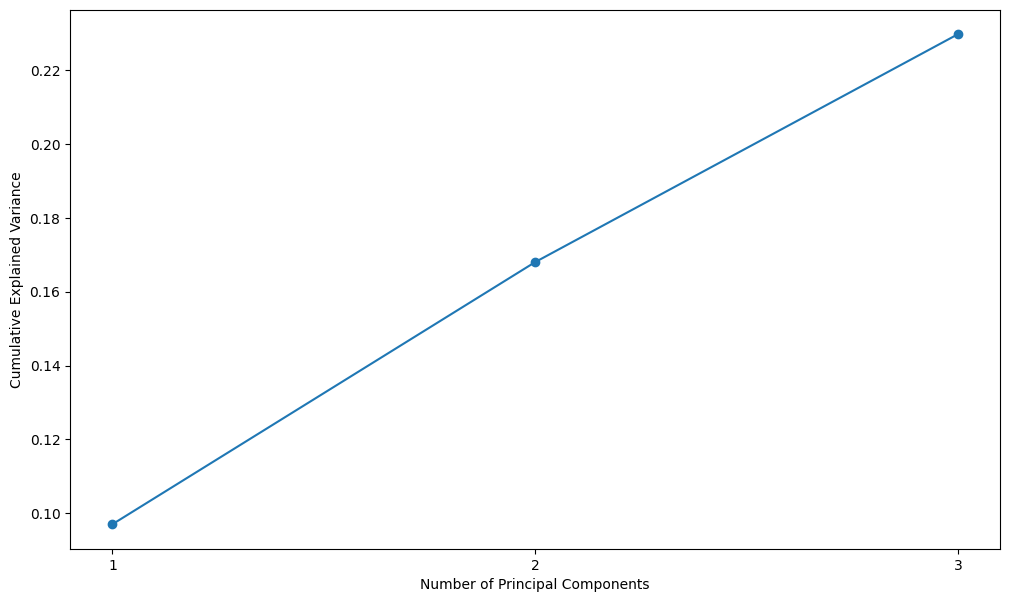

In [6]:
pca = PCAWithEigenDecomposition(n_components=3)

X_train_proj = pca.fit_transform(X_train_scaled)
X_test_proj = pca.transform(X_test_scaled)

In [7]:
n_clusters = 10

kmeans = CustomKMeans(n_clusters=n_clusters)
kmeans.fit(X_train_proj)

y_train_pred = kmeans.predict(X_train_proj)

train_nmi = normalized_mutual_info_score(y_train, y_train_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_train, y_train_pred)
# print(cm)

print(f"Number of K-means clustering = {n_clusters}")

print(f"Training Purity: {kmeans.purity_metric(cm)}")
print(f"Training Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Training NMI = {round(train_nmi, 3)}")

y_test_pred = kmeans.predict(X_test_proj)

test_nmi = normalized_mutual_info_score(y_test, y_test_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_test, y_test_pred)
# print(cm)

print(f"Testing Purity: {kmeans.purity_metric(cm)}")
print(f"Testing Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Testing NMI = {round(test_nmi, 3)}")

Iterations:  30%|████████▋                    | 149/500 [00:03<00:09, 37.77it/s]


Number of K-means clustering = 10
Training Purity: 0.411
Training Avg. Gini Co.efficient: 0.696
Training NMI = 0.335
Testing Purity: 0.422
Testing Avg. Gini Co.efficient: 0.694
Testing NMI = 0.341


Iterating: 100%|█████████████████████████| 10000/10000 [00:41<00:00, 242.99it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


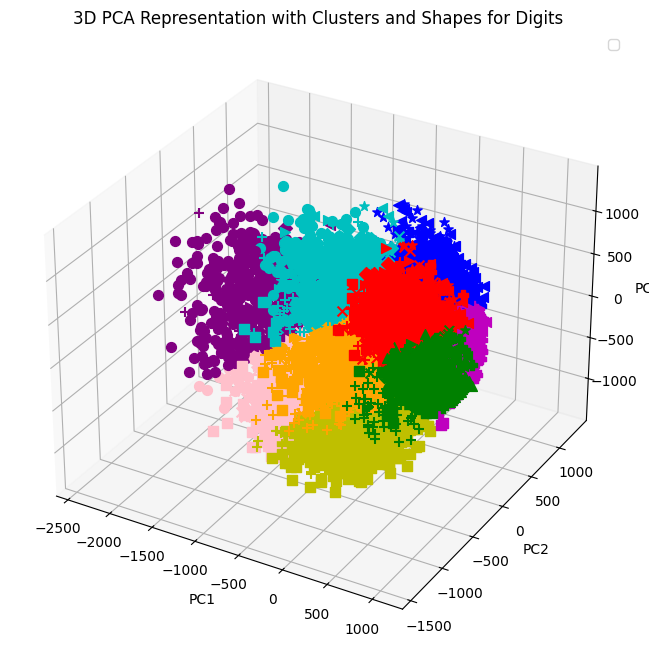

In [8]:
from tqdm import tqdm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map labels to shapes
label_shape_mapping = {0: 'o', 1: '^', 2: '+', 3: 's', 4: '*', 5: 'x', 6: 'D', 7: 'P', 8: '>', 9: '<'}

# Map cluster IDs to colors
cluster_color_mapping = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y', 6: 'orange', 7: 'pink', 8: 'purple', 9: 'brown'}

for i in tqdm(range(X_test_proj.shape[0]), desc="Iterating"):
    ax.scatter(X_test_proj[i][0], X_test_proj[i][1], X_test_proj[i][2],
               c=cluster_color_mapping[y_test_pred[i]],
               marker=label_shape_mapping[y_test[i]], s=50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Representation with Clusters and Shapes for Digits')

plt.legend()
plt.show()

In [9]:
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab'

import plotly.graph_objs as go

# Map labels to shapes
label_shape_mapping = {0: 'circle', 1: 'square', 2: 'cross', 3: 'diamond', 4: 'x', 5: 'triangle-up', 6: 'triangle-down', 7: 'star', 8: 'hexagon', 9: 'octagon'}
shapes = np.array([label_shape_mapping[label] for label in y_test])

# Map cluster IDs to colors
cluster_color_mapping = {0: 'red', 1: 'green', 2: 'blue', 3: 'cyan', 4: 'magenta', 5: 'yellow', 6: 'orange', 7: 'pink', 8: 'purple', 9: 'brown'}
colors = np.array([cluster_color_mapping[cluster_id] for cluster_id in y_test_pred])

# Create trace for each digit label
traces = []
for label in np.unique(y_test):
    trace = go.Scatter3d(
        x=X_test_proj[y_test == label, 0],
        y=X_test_proj[y_test == label, 1],
        z=X_test_proj[y_test == label, 2],
        mode='markers',
        marker=dict(
            # color=colors[y_test == label],
            # symbol=shapes[y_test == label],
            size=5,
            opacity=0.8
        ),
        name=f'Digit {label}'
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Interactive 3D PCA Representation with Clusters and Shapes for Digits',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

Rand Index = [12  7 10]


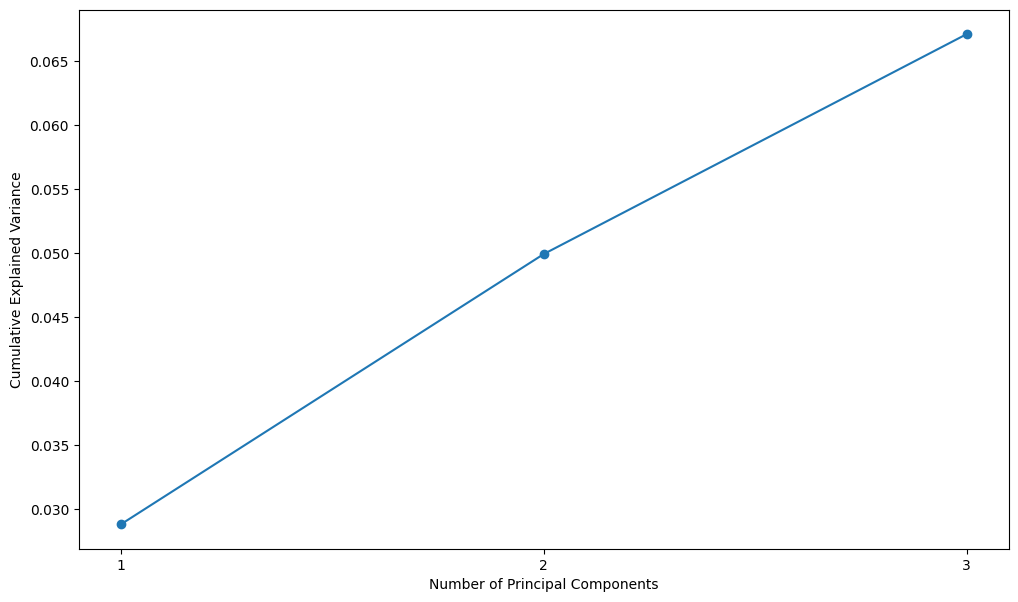

In [10]:
pca = RandomPCA(n_components=3, top_k=15)
X_train_proj = pca.fit_transform(X_train_scaled)
X_test_proj = pca.transform(X_test_scaled)

In [11]:
n_clusters = 10

kmeans = CustomKMeans(n_clusters=n_clusters)
kmeans.fit(X_train_proj)

y_train_pred = kmeans.predict(X_train_proj)

train_nmi = normalized_mutual_info_score(y_train, y_train_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_train, y_train_pred)
# print(cm)

print(f"Number of K-means clustering = {n_clusters}")

print(f"Training Purity: {kmeans.purity_metric(cm)}")
print(f"Training Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Training NMI = {round(train_nmi, 3)}")

y_test_pred = kmeans.predict(X_test_proj)

test_nmi = normalized_mutual_info_score(y_test, y_test_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_test, y_test_pred)
# print(cm)

print(f"Testing Purity: {kmeans.purity_metric(cm)}")
print(f"Testing Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Testing NMI = {round(test_nmi, 3)}")

Iterations:  22%|██████▍                      | 111/500 [00:02<00:10, 37.32it/s]


Number of K-means clustering = 10
Training Purity: 0.272
Training Avg. Gini Co.efficient: 0.828
Training NMI = 0.142
Testing Purity: 0.278
Testing Avg. Gini Co.efficient: 0.824
Testing NMI = 0.148


In [12]:
# Map labels to shapes
# label_shape_mapping = {0: 'circle', 1: 'square', 2: 'cross', 3: 'diamond', 4: 'x', 5: 'triangle-up', 6: 'triangle-down', 7: 'star', 8: 'hexagon', 9: 'octagon'}
label_shape_mapping = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
shapes = np.array([label_shape_mapping[label] for label in y_test])

# Map cluster IDs to colors
cluster_color_mapping = {0: 'red', 1: 'green', 2: 'blue', 3: 'cyan', 4: 'magenta', 5: 'yellow', 6: 'orange', 7: 'pink', 8: 'purple', 9: 'brown'}
colors = np.array([cluster_color_mapping[cluster_id] for cluster_id in y_test_pred])

# Create trace for each digit label
traces = []
for label in np.unique(y_test):
    trace = go.Scatter3d(
        x=X_test_proj[y_test == label, 0],
        y=X_test_proj[y_test == label, 1],
        z=X_test_proj[y_test == label, 2],
        mode='markers',
        marker=dict(
            color=colors[y_test == label],
            # symbol=shapes[y_test == label],
            size=5,
            opacity=0.8
        ),
        name=f'Digit {label}'
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Interactive 3D PCA Representation with Clusters and Shapes for Digits',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

Rand Index = [13  7 12]


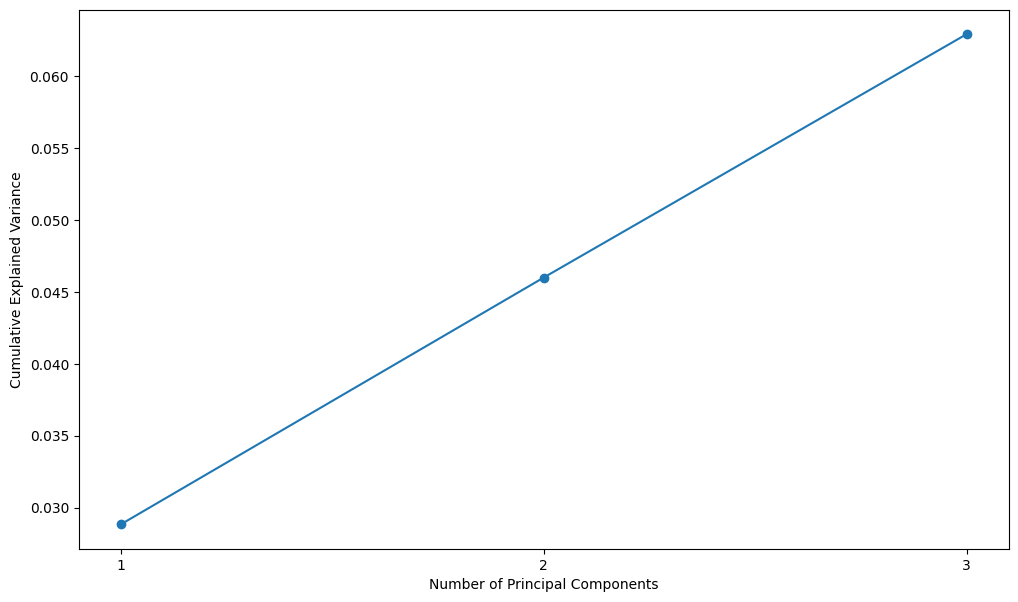

In [13]:
pca = RandomPCA(n_components=3, top_k=15)
X_train_proj = pca.fit_transform(X_train_scaled)
X_test_proj = pca.transform(X_test_scaled)

In [14]:
n_clusters = 10

kmeans = CustomKMeans(n_clusters=n_clusters)
kmeans.fit(X_train_proj)

y_train_pred = kmeans.predict(X_train_proj)

train_nmi = normalized_mutual_info_score(y_train, y_train_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_train, y_train_pred)
# print(cm)

print(f"Number of K-means clustering = {n_clusters}")

print(f"Training Purity: {kmeans.purity_metric(cm)}")
print(f"Training Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Training NMI = {round(train_nmi, 3)}")

y_test_pred = kmeans.predict(X_test_proj)

test_nmi = normalized_mutual_info_score(y_test, y_test_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_test, y_test_pred)
# print(cm)

print(f"Testing Purity: {kmeans.purity_metric(cm)}")
print(f"Testing Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Testing NMI = {round(test_nmi, 3)}")

Iterations:  29%|████████▌                    | 147/500 [00:03<00:09, 37.17it/s]


Number of K-means clustering = 10
Training Purity: 0.285
Training Avg. Gini Co.efficient: 0.831
Training NMI = 0.129
Testing Purity: 0.284
Testing Avg. Gini Co.efficient: 0.828
Testing NMI = 0.136


In [15]:
# Map labels to shapes
# label_shape_mapping = {0: 'circle', 1: 'square', 2: 'cross', 3: 'diamond', 4: 'x', 5: 'triangle-up', 6: 'triangle-down', 7: 'star', 8: 'hexagon', 9: 'octagon'}
label_shape_mapping = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
shapes = np.array([label_shape_mapping[label] for label in y_test])

# Map cluster IDs to colors
cluster_color_mapping = {0: 'red', 1: 'green', 2: 'blue', 3: 'cyan', 4: 'magenta', 5: 'yellow', 6: 'orange', 7: 'pink', 8: 'purple', 9: 'brown'}
colors = np.array([cluster_color_mapping[cluster_id] for cluster_id in y_test_pred])

# Create trace for each digit label
traces = []
for label in np.unique(y_test):
    trace = go.Scatter3d(
        x=X_test_proj[y_test == label, 0],
        y=X_test_proj[y_test == label, 1],
        z=X_test_proj[y_test == label, 2],
        mode='markers',
        marker=dict(
            color=colors[y_test == label],
            # symbol=shapes[y_test == label],
            size=5,
            opacity=0.8
        ),
        name=f'Digit {label}'
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Interactive 3D PCA Representation with Clusters and Shapes for Digits',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

Rand Index = [ 1 11  2]


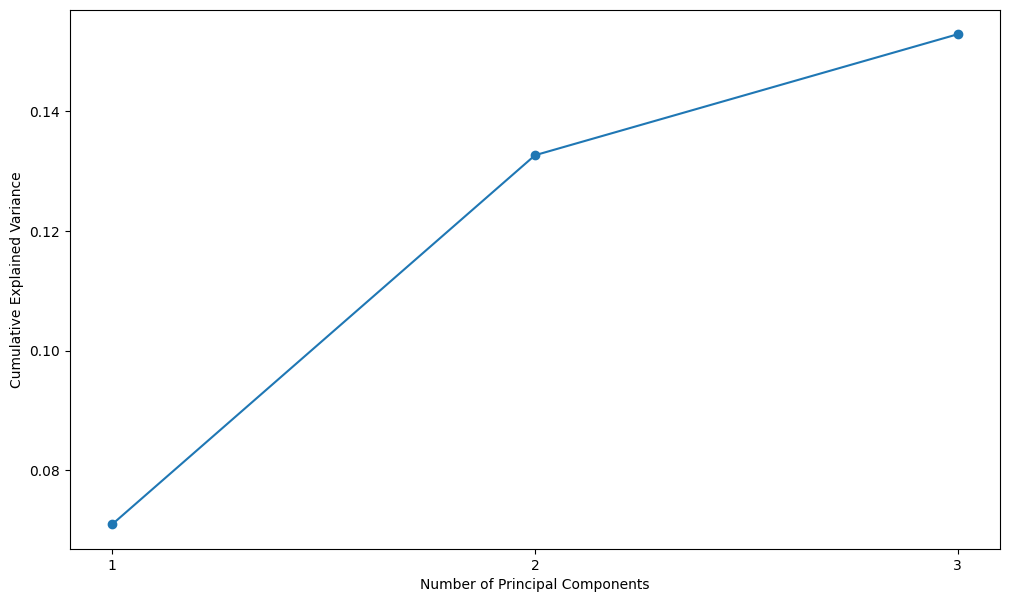

In [16]:
pca = RandomPCA(n_components=3, top_k=15)
X_train_proj = pca.fit_transform(X_train_scaled)
X_test_proj = pca.transform(X_test_scaled)

In [17]:
n_clusters = 10

kmeans = CustomKMeans(n_clusters=n_clusters)
kmeans.fit(X_train_proj)

y_train_pred = kmeans.predict(X_train_proj)

train_nmi = normalized_mutual_info_score(y_train, y_train_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_train, y_train_pred)
# print(cm)

print(f"Number of K-means clustering = {n_clusters}")

print(f"Training Purity: {kmeans.purity_metric(cm)}")
print(f"Training Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Training NMI = {round(train_nmi, 3)}")

y_test_pred = kmeans.predict(X_test_proj)

test_nmi = normalized_mutual_info_score(y_test, y_test_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_test, y_test_pred)
# print(cm)

print(f"Testing Purity: {kmeans.purity_metric(cm)}")
print(f"Testing Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Testing NMI = {round(test_nmi, 3)}")

Iterations:  12%|███▋                          | 61/500 [00:01<00:13, 33.50it/s]


Number of K-means clustering = 10
Training Purity: 0.353
Training Avg. Gini Co.efficient: 0.766
Training NMI = 0.263
Testing Purity: 0.348
Testing Avg. Gini Co.efficient: 0.763
Testing NMI = 0.271


In [18]:
# Map labels to shapes
# label_shape_mapping = {0: 'circle', 1: 'square', 2: 'cross', 3: 'diamond', 4: 'x', 5: 'triangle-up', 6: 'triangle-down', 7: 'star', 8: 'hexagon', 9: 'octagon'}
label_shape_mapping = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
shapes = np.array([label_shape_mapping[label] for label in y_test])

# Map cluster IDs to colors
cluster_color_mapping = {0: 'red', 1: 'green', 2: 'blue', 3: 'cyan', 4: 'magenta', 5: 'yellow', 6: 'orange', 7: 'pink', 8: 'purple', 9: 'brown'}
colors = np.array([cluster_color_mapping[cluster_id] for cluster_id in y_test_pred])

# Create trace for each digit label
traces = []
for label in np.unique(y_test):
    trace = go.Scatter3d(
        x=X_test_proj[y_test == label, 0],
        y=X_test_proj[y_test == label, 1],
        z=X_test_proj[y_test == label, 2],
        mode='markers',
        marker=dict(
            color=colors[y_test == label],
            # symbol=shapes[y_test == label],
            size=5,
            opacity=0.8
        ),
        name=f'Digit {label}'
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Interactive 3D PCA Representation with Clusters and Shapes for Digits',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

Rand Index = [13 10  7]


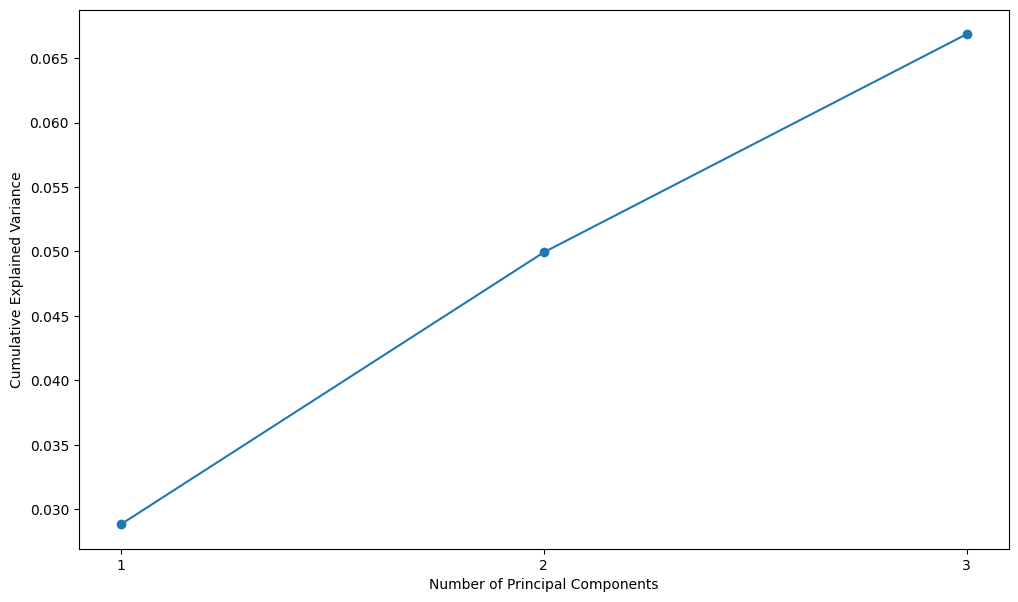

In [19]:
pca = RandomPCA(n_components=3, top_k=15)
X_train_proj = pca.fit_transform(X_train_scaled)
X_test_proj = pca.transform(X_test_scaled)

In [20]:
n_clusters = 10

kmeans = CustomKMeans(n_clusters=n_clusters)
kmeans.fit(X_train_proj)

y_train_pred = kmeans.predict(X_train_proj)

train_nmi = normalized_mutual_info_score(y_train, y_train_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_train, y_train_pred)
# print(cm)

print(f"Number of K-means clustering = {n_clusters}")

print(f"Training Purity: {kmeans.purity_metric(cm)}")
print(f"Training Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Training NMI = {round(train_nmi, 3)}")

y_test_pred = kmeans.predict(X_test_proj)

test_nmi = normalized_mutual_info_score(y_test, y_test_pred)
cm = kmeans.get_confusion_matrix(10, n_clusters, y_test, y_test_pred)
# print(cm)

print(f"Testing Purity: {kmeans.purity_metric(cm)}")
print(f"Testing Avg. Gini Co.efficient: {kmeans.avg_gini_coefficient(cm)}")
print(f"Testing NMI = {round(test_nmi, 3)}")

Iterations:  16%|████▊                         | 80/500 [00:02<00:11, 36.63it/s]


Number of K-means clustering = 10
Training Purity: 0.254
Training Avg. Gini Co.efficient: 0.842
Training NMI = 0.118
Testing Purity: 0.264
Testing Avg. Gini Co.efficient: 0.835
Testing NMI = 0.127


In [21]:
# Map labels to shapes
# label_shape_mapping = {0: 'circle', 1: 'square', 2: 'cross', 3: 'diamond', 4: 'x', 5: 'triangle-up', 6: 'triangle-down', 7: 'star', 8: 'hexagon', 9: 'octagon'}
label_shape_mapping = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
shapes = np.array([label_shape_mapping[label] for label in y_test])

# Map cluster IDs to colors
cluster_color_mapping = {0: 'red', 1: 'green', 2: 'blue', 3: 'cyan', 4: 'magenta', 5: 'yellow', 6: 'orange', 7: 'pink', 8: 'purple', 9: 'brown'}
colors = np.array([cluster_color_mapping[cluster_id] for cluster_id in y_test_pred])

# Create trace for each digit label
traces = []
for label in np.unique(y_test):
    trace = go.Scatter3d(
        x=X_test_proj[y_test == label, 0],
        y=X_test_proj[y_test == label, 1],
        z=X_test_proj[y_test == label, 2],
        mode='markers',
        marker=dict(
            color=colors[y_test == label],
            # symbol=shapes[y_test == label],
            size=5,
            opacity=0.8
        ),
        name=f'Digit {label}'
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Interactive 3D PCA Representation with Clusters and Shapes for Digits',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()